# Introducing image processing and scikit image

## Image reconstruction

* Fixing damaged images
* Text removing
* Logo removing
* Object removing

### Inpainting

* Reconstructing lost parts of images
* Looking at the non-damaged regions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
image_with_logo = plt.imread('data/4.2.06_w_logo_2_2.png')

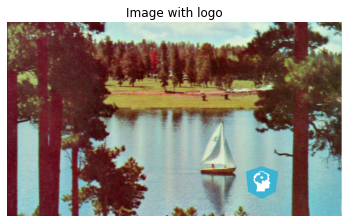

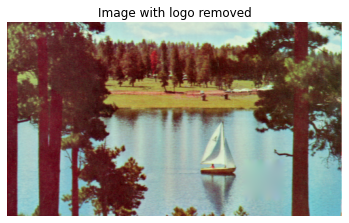

In [4]:
# Import the module from restoration
from skimage.restoration import inpaint

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

## Denoising types

* Total variation (TV)
* Bilateral
* Wavelet denoising
* Non-local means denoising

In [5]:
fruit_image = plt.imread('data/fruits_square.jpg')

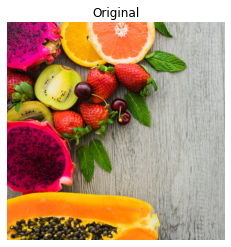

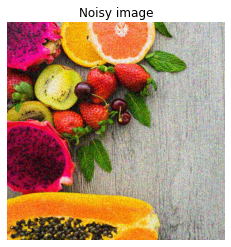

In [6]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

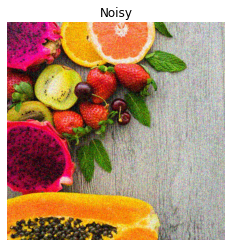

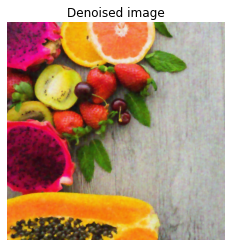

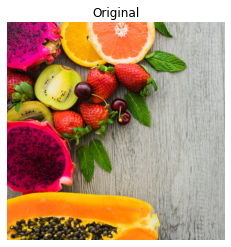

In [7]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')
show_image(fruit_image, 'Original')

In [8]:
landscape_image = plt.imread('data/noise-noisy-nature.jpg')

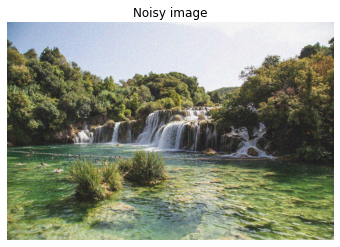

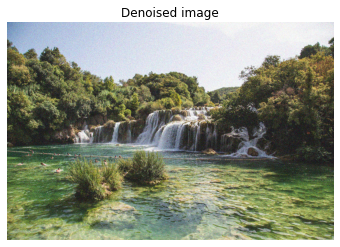

In [9]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

## Superpixel segmentation

In [10]:
face_image = plt.imread('data/chinese.jpg')

/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()


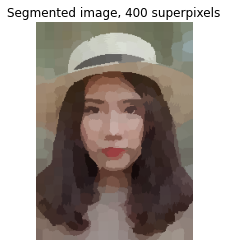

In [11]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

## Finding countours